# Point-defects calculations

In [1]:
#! pip install pynter-defects

## VASP input files

Create VASP input files to run charged point defects DFT calculations with VASP. 

Check out these notebooks for more details:
- Create inputs for VASP : [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lorenzo-villa-hub/pynter-tutorials/blob/master/notebooks/vasp/schemes/create_schemes.ipynb)
- Schemes relative to defects : [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lorenzo-villa-hub/pynter-tutorials/blob/master/notebooks/defects/vasp/setup_calculations.ipynb)

In [2]:
from pynter.vasp.schemes import AdvancedSchemes
from pynter.tools.materials_project import MPDatabase

/nfshome/villa/miniconda3/envs/recent/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
structure = MPDatabase('mp-149').get_structure()
structure

/nfshome/villa/miniconda3/envs/recent/lib/python3.11/site-packages/pymatgen/ext/matproj.py:183: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


Structure Summary
Lattice
    abc : 3.839943374653261 3.839943378813096 3.83994338
 angles : 59.99999998977525 59.99999995393976 60.00000000512866
 volume : 40.036809671145996
      A : 3.32548851 0.0 1.91997169
      B : 1.10849617 3.13530064 1.91997169
      C : 0.0 0.0 3.83994338
    pbc : True True True
PeriodicSite: Si (3.8797, 2.7434, 6.7199) [0.8750, 0.8750, 0.8750]
PeriodicSite: Si (0.5542, 0.3919, 0.9600) [0.1250, 0.1250, 0.1250]

In [4]:
schemes = AdvancedSchemes(path='./example_files',structure=structure,name='Si-defects')
jobs_vacancies = schemes.vacancies_pbe_relaxation({'Si':[-1,0,1]}, supercell_size=3)
jobs_substitutions = schemes.substitutions_pbe_relaxation({'P-on-Si':[0,1,2],'B-on-Si':[-2,-1,0]},supercell_size=3)

# Create Dataset to group jobs

More details can be found here: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lorenzo-villa-hub/pynter-tutorials/blob/master/notebooks/datasets/create_dataset.ipynb)

In [5]:
from pynter.data.datasets import Dataset

In [6]:
ds = Dataset(jobs=jobs_vacancies+jobs_substitutions)
ds.jobs_table()

,formula,group,nodes,is_converged
job_name,,,,
Si-defects_Sub_B_on_Si_q-1_PBE-rel_1,Si53 B1,Sub_B_on_Si,/q-1/1-PBE-SCF,None
Si-defects_Sub_B_on_Si_q-1_PBE-rel_2,Si53 B1,Sub_B_on_Si,/q-1/2-PBE-OPT,None
Si-defects_Sub_B_on_Si_q-2_PBE-rel_1,Si53 B1,Sub_B_on_Si,/q-2/1-PBE-SCF,None
Si-defects_Sub_B_on_Si_q-2_PBE-rel_2,Si53 B1,Sub_B_on_Si,/q-2/2-PBE-OPT,None
Si-defects_Sub_B_on_Si_q0_PBE-rel_1,Si53 B1,Sub_B_on_Si,/q0/1-PBE-SCF,None
Si-defects_Sub_B_on_Si_q0_PBE-rel_2,Si53 B1,Sub_B_on_Si,/q0/2-PBE-OPT,None
Si-defects_Sub_P_on_Si_q0_PBE-rel_1,Si53 P1,Sub_P_on_Si,/q0/1-PBE-SCF,None
Si-defects_Sub_P_on_Si_q0_PBE-rel_2,Si53 P1,Sub_P_on_Si,/q0/2-PBE-OPT,None
Si-defects_Sub_P_on_Si_q1_PBE-rel_1,Si53 P1,Sub_P_on_Si,/q1/1-PBE-SCF,None


In [7]:
#ds.write_jobs_input()

### after jobs are run ...

Import `Dataset` from the calculation directory. Object can be stored as `json` to save space and speed up the workflow.

More details here: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lorenzo-villa-hub/pynter-tutorials/blob/master/notebooks/datasets/analyse_dataset.ipynb)

In [8]:
# import os
# homedir = os.getenv('HOME')
# path = os.path.join(homedir,"local-data/pynter-test-files/Si-defects")

# ds = Dataset.from_directory(path)

In [9]:
#ds.to_json('./Si-defects_dataset.json')

In [10]:
from pynter.tools.utils import get_content_from_url
import os

local_file = './Si-defects_dataset.json'
if os.path.exists(local_file):
    ds_file = local_file
else:
    ds_file = get_content_from_url('https://raw.githubusercontent.com/lorenzo-villa-hub/pynter-tutorials/master/notebooks/Si-defects_dataset.json')

ds = Dataset.from_json(ds_file)

In [11]:
ds.jobs_table(display=['charge'])

,formula,group,nodes,is_converged,charge
job_name,,,,,
Si-PBE-SCF,Si2,Bulk-unit-cell,,True,0.0
Si-bulk_PBE-SCF,Si54,Bulk-3x3x3-supercell,,True,0.0
Si-test_Int_Si(mult108)_q-1_PBE-rel_1,Si55,Int_Si_mult108,/q-1/1-PBE-SCF,True,-1.0
Si-test_Int_Si(mult108)_q-1_PBE-rel_2,Si55,Int_Si_mult108,/q-1/2-PBE-OPT,True,-1.0
Si-test_Int_Si(mult108)_q0_PBE-rel_1,Si55,Int_Si_mult108,/q0/1-PBE-SCF,True,0.0
Si-test_Int_Si(mult108)_q0_PBE-rel_2,Si55,Int_Si_mult108,/q0/2-PBE-OPT,True,0.0
Si-test_Int_Si(mult108)_q1_PBE-rel_1,Si55,Int_Si_mult108,/q1/1-PBE-SCF,True,1.0
Si-test_Int_Si(mult108)_q1_PBE-rel_2,Si55,Int_Si_mult108,/q1/2-PBE-OPT,True,1.0
Si-test_Int_Si(mult54)_q-1_PBE-rel_1,Si55,Int_Si_mult54,/q-1/1-PBE-SCF,True,-1.0


In [12]:
job_bulk = ds.select_jobs(group='Bulk-3x3x3-supercell')[0]
job_bulk

VaspJob "Si-bulk_PBE-SCF" of group "Bulk-3x3x3-supercell"

In [13]:
jobs = ds.select_jobs(common_node='2-PBE-OPT')
ds.jobs_table(jobs,display=['charge'])

,formula,group,nodes,is_converged,charge
job_name,,,,,
Si-test_Int_Si(mult108)_q-1_PBE-rel_2,Si55,Int_Si_mult108,/q-1/2-PBE-OPT,True,-1.0
Si-test_Int_Si(mult108)_q0_PBE-rel_2,Si55,Int_Si_mult108,/q0/2-PBE-OPT,True,0.0
Si-test_Int_Si(mult108)_q1_PBE-rel_2,Si55,Int_Si_mult108,/q1/2-PBE-OPT,True,1.0
Si-test_Int_Si(mult54)_q-1_PBE-rel_2,Si55,Int_Si_mult54,/q-1/2-PBE-OPT,True,-1.0
Si-test_Int_Si(mult54)_q0_PBE-rel_2,Si55,Int_Si_mult54,/q0/2-PBE-OPT,True,0.0
Si-test_Int_Si(mult54)_q1_PBE-rel_2,Si55,Int_Si_mult54,/q1/2-PBE-OPT,True,1.0
Si-test_Sub_B_on_Si_q-1_PBE-rel_2,Si53 B1,Sub_B_on_Si,/q-1/2-PBE-OPT,True,-1.0
Si-test_Sub_B_on_Si_q-2_PBE-rel_2,Si53 B1,Sub_B_on_Si,/q-2/2-PBE-OPT,True,-2.0
Si-test_Sub_B_on_Si_q0_PBE-rel_2,Si53 B1,Sub_B_on_Si,/q0/2-PBE-OPT,True,0.0


# Import defect calculations
Collect each defect calculation as `DefectEntry` and group entries in `DefectsAnalysis` object.
More details can be found in these notebooks:
- Create defect entries: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lorenzo-villa-hub/pynter-tutorials/blob/master/notebooks/defects/create_entries.ipynb)
- Group entries to analyse defects collectively: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lorenzo-villa-hub/pynter-tutorials/blob/master/notebooks/defects/analyse_and_plot.ipynb)

In [14]:
from pynter.defects.entries import DefectEntry
from pynter.defects.analysis import DefectsAnalysis

In [15]:
entries = []
for j in jobs:
    entry = DefectEntry.from_jobs(job_defect=j,job_bulk=job_bulk,corrections={},multiplicity=None,data={'stress':j.stress})
    entries.append(entry)

/nfshome/villa/pynter/pynter/defects/entries.py:232: UserWarning: get_multiplicity not implemented for Interstitial, setting multiplicity to 1
  warnings.warn(f'get_multiplicity not implemented for {defect.defect_type}, setting multiplicity to 1')
/nfshome/villa/pynter/pynter/defects/entries.py:232: UserWarning: get_multiplicity not implemented for DefectComplex, setting multiplicity to 1
  warnings.warn(f'get_multiplicity not implemented for {defect.defect_type}, setting multiplicity to 1')


In [16]:
da = DefectsAnalysis(entries,vbm=job_bulk.vbm,band_gap=job_bulk.energy_gap)
da.get_dataframe()

,symbol,delta atoms,charge,multiplicity
name,,,,
Int_Si,$Si_{i}$,{'Si': 1},-1.0,1
Int_Si,$Si_{i}$,{'Si': 1},-1.0,1
Int_Si,$Si_{i}$,{'Si': 1},0.0,1
Int_Si,$Si_{i}$,{'Si': 1},0.0,1
Int_Si,$Si_{i}$,{'Si': 1},1.0,1
Int_Si,$Si_{i}$,{'Si': 1},1.0,1
Sub_B_on_Si,$B_{Si}$,"{'B': 1, 'Si': -1}",-2.0,54
Sub_B_on_Si,$B_{Si}$,"{'B': 1, 'Si': -1}",-1.0,54
Sub_B_on_Si,$B_{Si}$,"{'B': 1, 'Si': -1}",0.0,54


# Define chemical potentials

In this examples we set chemical potentials relative to the elemental phases. This is usually not the case, as chemical potentials are usually defined according to the stability diagram of the target phase, which requires the calculation of the phase diagram which includes all competing phases. To get started on how to do this, check the following tutorials: 
- Create phase diagram : [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lorenzo-villa-hub/pynter-tutorials/blob/master/notebooks/phase_diagram/create_PD.ipynb)
- Analyse phase diagram : [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lorenzo-villa-hub/pynter-tutorials/blob/master/notebooks/phase_diagram/analyse_PD.ipynb)
- Define chemical potentials [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lorenzo-villa-hub/pynter-tutorials/blob/master/notebooks/phase_diagram/create_reservoirs.ipynb)


In [17]:
from pynter.phase_diagram.chempots import Chempots

compositions = da.elements
entries_dict = MPDatabase().get_entries_from_compositions(compositions,lowest_e_above_hull=True)
chempots_dict = {el:entry.energy_per_atom for el,entry in entries_dict.items()} #get elemental chempots from MP
chempots = Chempots(chempots_dict)

/nfshome/villa/miniconda3/envs/recent/lib/python3.11/site-packages/pymatgen/ext/matproj.py:183: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(
/nfshome/villa/miniconda3/envs/recent/lib/python3.11/site-packages/pymatgen/ext/matproj.py:183: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(
/nfshome/villa/miniconda3/envs/recent/lib/python3.11/site-packages/pymatgen/ext/matproj.py:183: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer 

In [18]:
chempots

{'Si': -5.42, 'B': -6.68, 'P': -5.41}

# Plot formation energies

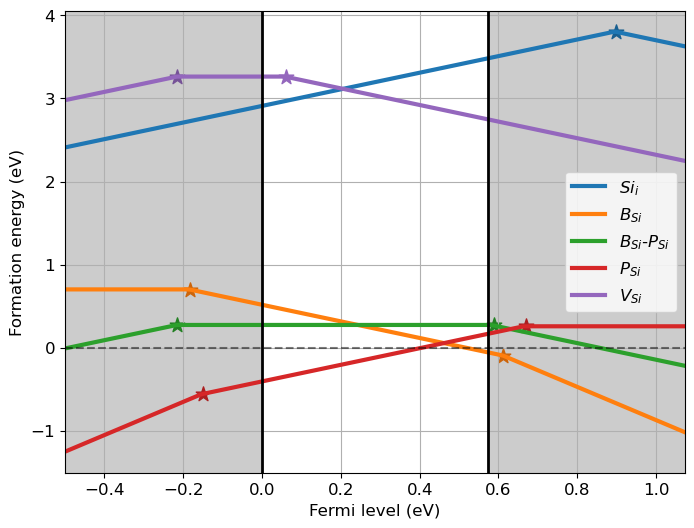

In [19]:
da.plot(chempots);

# Plot charge transition levels

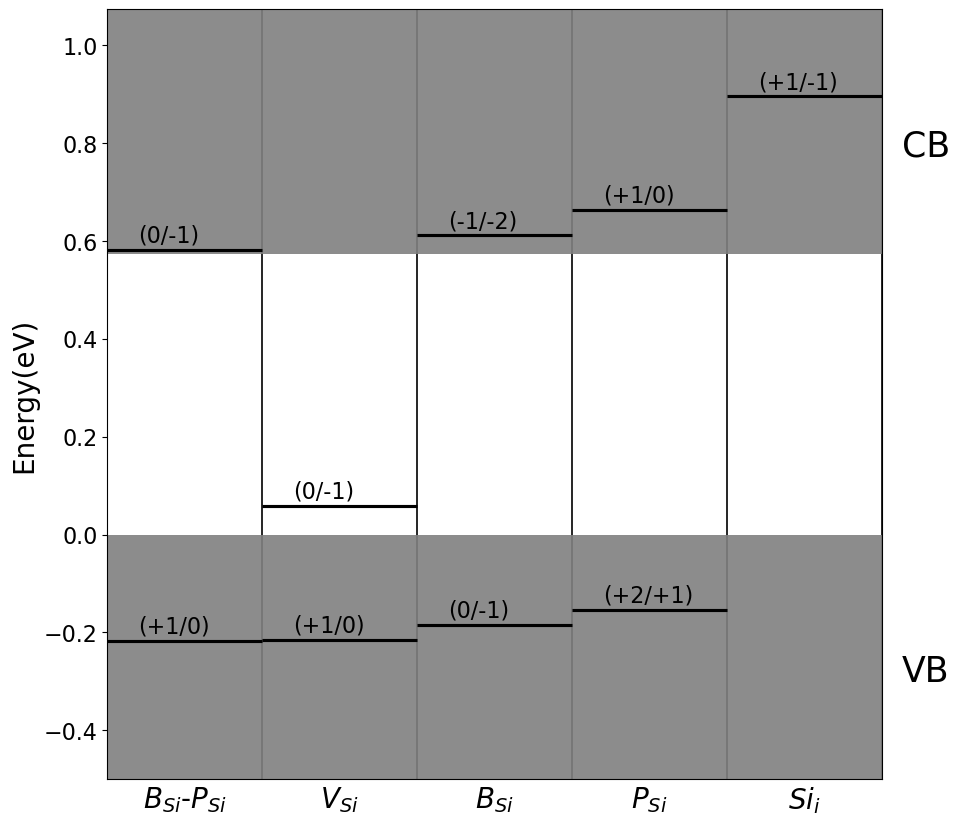

In [20]:
da.plot_ctl();

# Plot binding energies

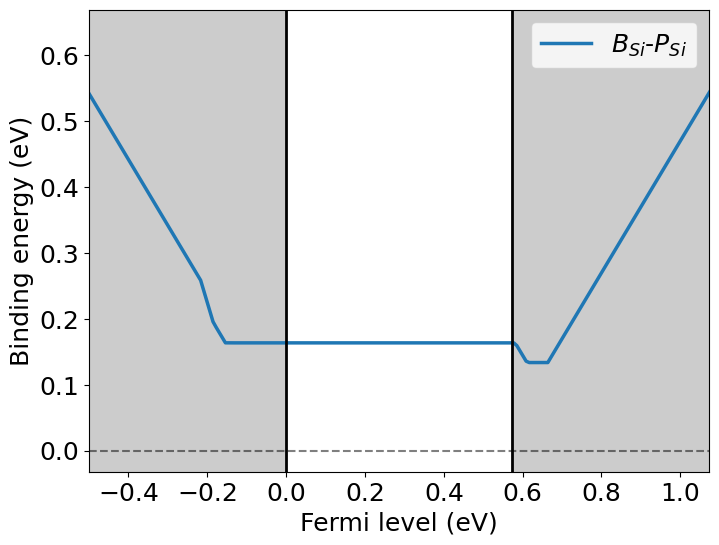

In [21]:
da.plot_binding_energies();

# Compute equilibrium Fermi level and defect concentrations

In [22]:
dos = MPDatabase().mp_rester.get_dos_by_material_id('mp-149') # DOS is needed to compute electrons and holes concentrations

/nfshome/villa/miniconda3/envs/recent/lib/python3.11/site-packages/pymatgen/ext/matproj.py:183: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


In [23]:
fermi_level = da.solve_fermi_level(chemical_potentials=chempots,bulk_dos=dos)
fermi_level

/nfshome/villa/pynter/pynter/defects/pmg/pmg_dos.py:1019: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((E - fermi) / (_cd("Boltzmann constant in eV/K") * T)))
/nfshome/villa/pynter/pynter/defects/pmg/pmg_dos.py:1029: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((fermi - E) / (_cd("Boltzmann constant in eV/K") * T)))


0.46147794532775865

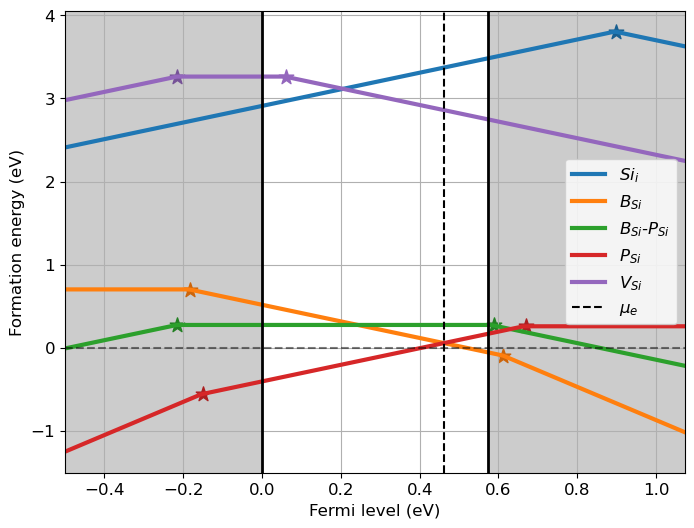

In [24]:
da.plot(chempots,fermi_level=fermi_level);

In [25]:
defect_concentrations = da.defect_concentrations(chemical_potentials=chempots,fermi_level=fermi_level)
defect_concentrations

[charge=-1.0, conc=5.74e-51, name=Int_Si, stable=True
charge=-1.0, conc=5.26e-52, name=Int_Si, stable=True
charge=0.0, conc=4.37e-44, name=Int_Si, stable=True
charge=0.0, conc=8.81e-44, name=Int_Si, stable=True
charge=1.0, conc=2.70e-44, name=Int_Si, stable=True
charge=1.0, conc=2.14e-36, name=Int_Si, stable=True
charge=-2.0, conc=1.84e+19, name=Sub_B_on_Si, stable=True
charge=-1.0, conc=5.97e+21, name=Sub_B_on_Si, stable=True
charge=0.0, conc=8.28e+10, name=Sub_B_on_Si, stable=True
charge=-1.0, conc=2.32e+14, name=Sub_B_on_Si-Sub_P_on_Si, stable=True
charge=0.0, conc=2.38e+16, name=Sub_B_on_Si-Sub_P_on_Si, stable=True
charge=1.0, conc=9.54e+04, name=Sub_B_on_Si-Sub_P_on_Si, stable=True
charge=0.0, conc=2.39e+18, name=Sub_P_on_Si, stable=True
charge=1.0, conc=6.01e+21, name=Sub_P_on_Si, stable=True
charge=2.0, conc=2.76e+11, name=Sub_P_on_Si, stable=True
charge=-1.0, conc=4.53e-26, name=Vac_Si, stable=True
charge=0.0, conc=7.54e-33, name=Vac_Si, stable=True
charge=1.0, conc=3.18e-44, n

In [26]:
defect_concentrations.total

{'Int_Si': 2.141365490607606e-36,
 'Sub_B_on_Si': 5.993059330519966e+21,
 'Sub_B_on_Si-Sub_P_on_Si': 2.4012250597150428e+16,
 'Sub_P_on_Si': 6.0168386388779e+21,
 'Vac_Si': 4.531355363663355e-26}

# Brower diagrams

For oxides, defects and carriers concentration can be studied as a function of the partial pressure of oxygen, to generate Brower diagrams. 
For an introduction on the procedure with `pynter`, check-out this notebook: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lorenzo-villa-hub/pynter-tutorials/blob/master/notebooks/defects/thermodynamics.ipynb)